In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
df_iris = pd.DataFrame(iris.data)

In [6]:
df_iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df_iris.columns = iris.feature_names

In [8]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


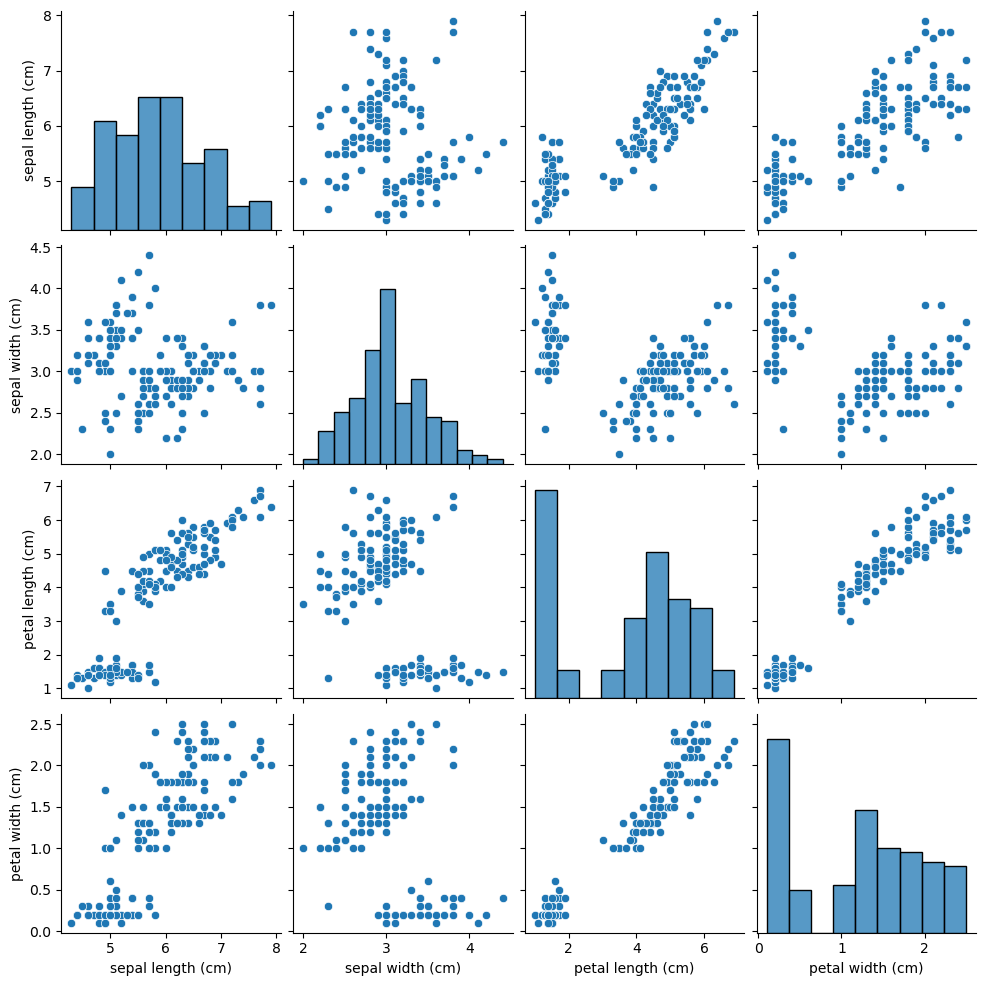

In [9]:
sns.pairplot(df_iris)

<Axes: >

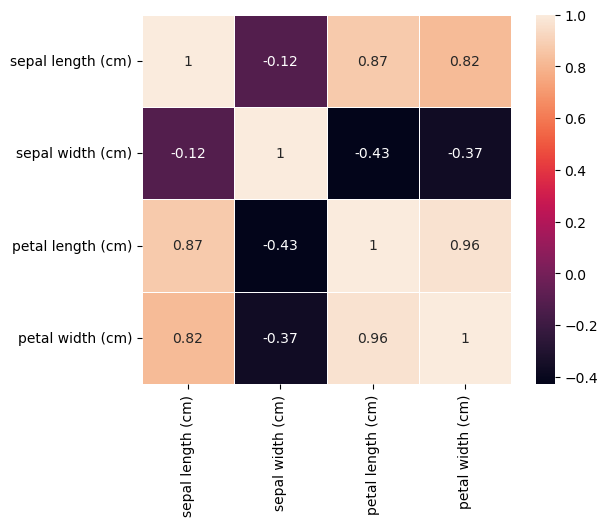

In [10]:
sns.heatmap(df_iris.corr(), square=True, annot=True, linewidths=.5)

In [11]:
X = df_iris.iloc[:, [2, 3]].values

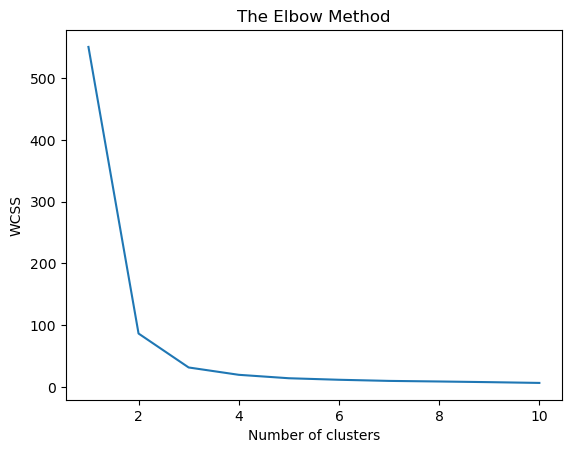

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)

In [14]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

In [15]:
pred=kmeans.fit_predict(X)

In [16]:
df_iris['cluster'] = pd.Series(kmeans.labels_)

In [17]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


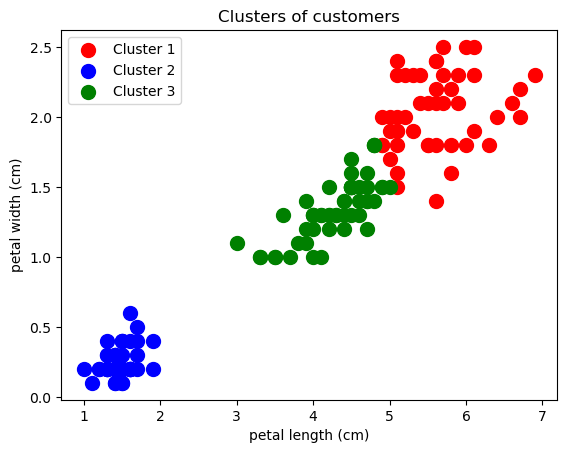

In [18]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [19]:
print(f'Silhouette score = {metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X))}')

Silhouette score = 0.6604800083974887


In [20]:
print(f'Calinski Harabasz score = {metrics.calinski_harabasz_score(X, kmeans.labels_)}')

Calinski Harabasz score = 1217.1934326018418


In [21]:
print(f'Davies Bouldin score = {metrics.davies_bouldin_score(X, kmeans.labels_)}')

Davies Bouldin score = 0.4847299226047572


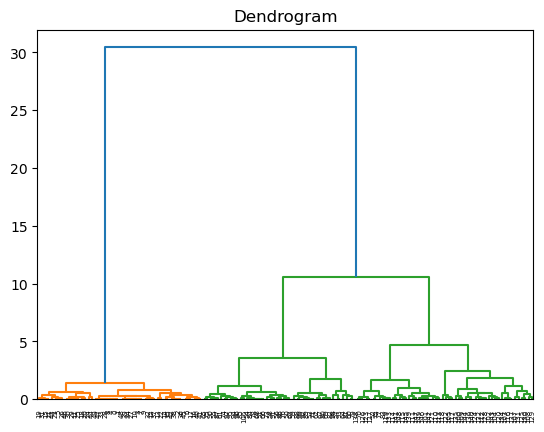

In [22]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

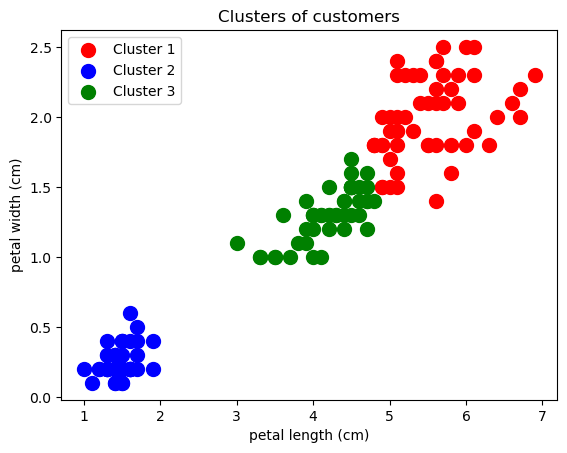

In [24]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [25]:
print(f'Silhouette score = {metrics.silhouette_score(X, hc.labels_, metric='euclidean', sample_size=len(X))}')

Silhouette score = 0.6573949269287821


In [26]:
print(f'Calinski Harabasz score = {metrics.calinski_harabasz_score(X, hc.labels_)}')

Calinski Harabasz score = 1194.0247602646912


In [27]:
print(f'Davies Bouldin score = {metrics.davies_bouldin_score(X, hc.labels_)}')

Davies Bouldin score = 0.4809209007961875


In [28]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [29]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=20, algorithm='ball_tree', metric='haversine')

In [30]:
model.fit(X)
dist, _ = model.kneighbors(X, n_neighbors=20, return_distance=True)

In [31]:
dist = dist[:, -1]

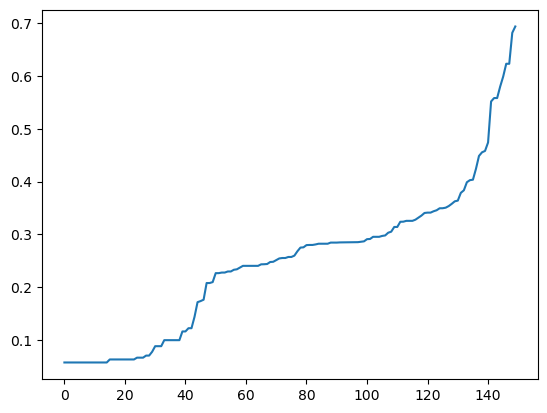

In [32]:
dist = np.sort(dist)
plt.plot(dist)

In [33]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=20, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.2, metric='haversine', min_samples=20)

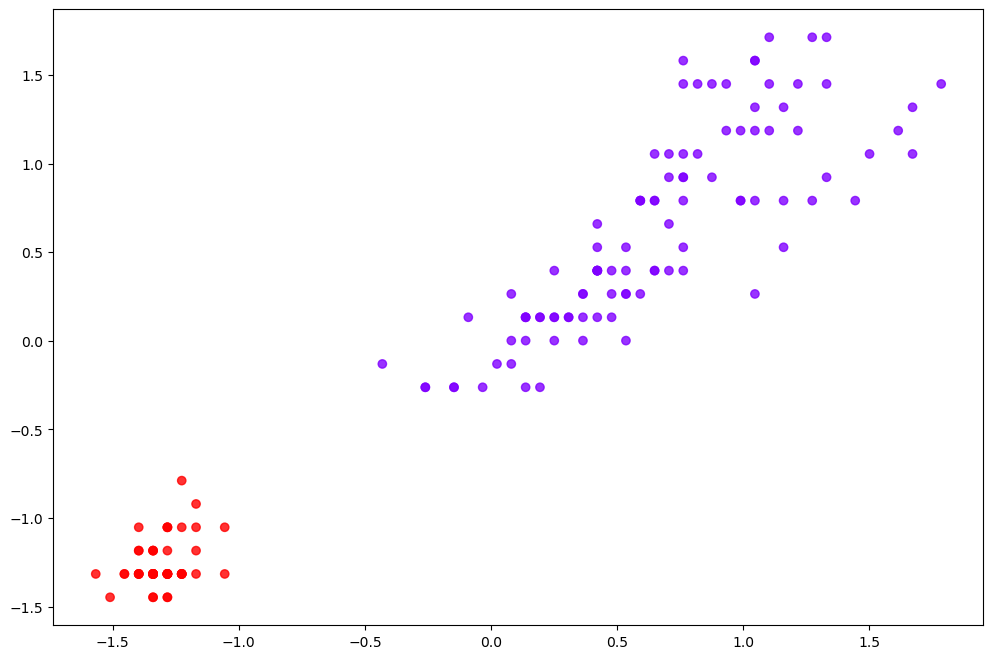

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_,cmap='rainbow', alpha=0.8)

In [35]:
print(f'Silhouette score = {metrics.silhouette_score(X, dbscan.labels_, metric='euclidean', sample_size=len(X))}')

Silhouette score = 0.7433719503339133


In [36]:
print(f'Calinski Harabasz score = {metrics.calinski_harabasz_score(X, dbscan.labels_)}')

Calinski Harabasz score = 671.6603081816857


In [37]:
print(f'Davies Bouldin score = {metrics.davies_bouldin_score(X, dbscan.labels_)}')

Davies Bouldin score = 0.2893194938812502


In [38]:
dbscan = DBSCAN(eps=0.4, min_samples=17, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.4, metric='haversine', min_samples=17)

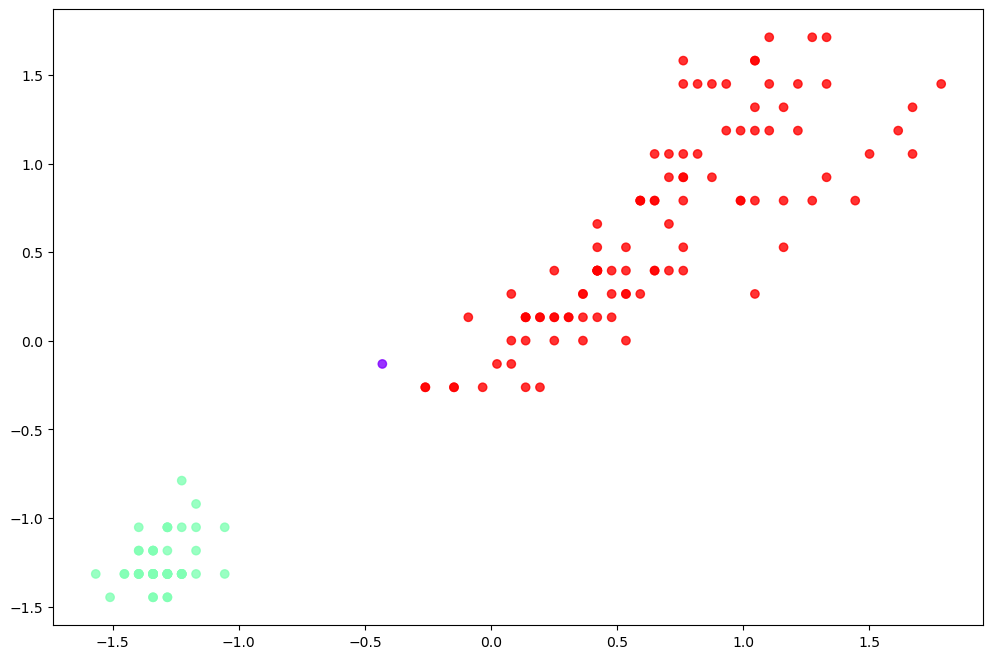

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_,cmap='rainbow', alpha=0.8)

In [40]:
print(f'Silhouette score = {metrics.silhouette_score(X, dbscan.labels_, metric='euclidean', sample_size=len(X))}')

Silhouette score = 0.4557597257197261


In [41]:
print(f'Calinski Harabasz score = {metrics.calinski_harabasz_score(X, dbscan.labels_)}')

Calinski Harabasz score = 347.2801209136672


In [42]:
print(f'Davies Bouldin score = {metrics.davies_bouldin_score(X, dbscan.labels_)}')

Davies Bouldin score = 0.4128495314337872
